In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

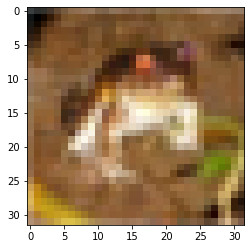

In [7]:
plt.imshow(x_train[0])

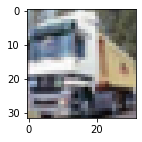

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
   

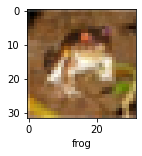

In [11]:
plot_sample(x_train,y_train,0)

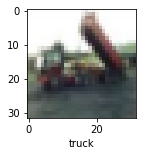

In [12]:
plot_sample(x_train,y_train,2)

In [13]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
ANN=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='sigmoid')])
ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.8128 - accuracy: 0.3519
Epoch 2/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.6230 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5400 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4802 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4323 - accuracy: 0.4969


In [16]:
ANN.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4898 - accuracy: 0.4728


[1.4897606372833252, 0.47279998660087585]

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ANN.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 9ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      1000
           1       0.73      0.46      0.56      1000
           2       0.34      0.38      0.36      1000
           3       0.32      0.43      0.37      1000
           4       0.56      0.24      0.34      1000
           5       0.52      0.27      0.35      1000
           6       0.41      0.73      0.53      1000
           7       0.58      0.53      0.55      1000
           8       0.62      0.54      0.58      1000
           9       0.61      0.46      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [18]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [19]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [20]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4762 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1152 - accuracy: 0.6069
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9875 - accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9129 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8517 - accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7953 - accuracy: 0.7255
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7497 - accuracy: 0.7395
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7174 - accuracy: 0.7500
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6750 - accuracy: 0.7637
Epoch 10/10
1563/1563 [==============================] - 26s 16m

In [21]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9333 - accuracy: 0.6921


[0.9332821369171143, 0.6920999884605408]

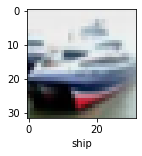

In [23]:
y_test=y_test.reshape(-1)
y_test[:5]
plot_sample(x_test,y_test,1)

In [24]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.7708973e-03, 1.4515250e-03, 8.8925175e-03, 8.0601192e-01,
        5.1179685e-04, 1.3032424e-01, 1.4923238e-02, 8.9347350e-06,
        1.2428370e-02, 2.3676455e-02],
       [4.5256894e-03, 1.6970220e-01, 8.1146602e-05, 2.4581295e-06,
        2.0250000e-07, 3.5002947e-07, 2.3609839e-06, 9.9453601e-09,
        8.2493526e-01, 7.5035205e-04],
       [1.5200177e-01, 5.6122237e-01, 2.3794968e-03, 1.6067770e-03,
        5.4778444e-04, 3.8832068e-04, 6.6763088e-05, 2.5157097e-03,
        2.6462901e-01, 1.4641991e-02],
       [7.6492035e-01, 7.3847361e-02, 3.6567955e-03, 1.7043720e-03,
        1.8924676e-03, 3.9490777e-05, 7.1570673e-04, 1.0170987e-04,
        1.5236548e-01, 7.5622037e-04],
       [2.5178299e-06, 1.0192613e-05, 5.8846023e-02, 1.8227134e-02,
        3.6107776e-01, 9.1247575e-04, 5.6091362e-01, 6.9072217e-07,
        7.8652074e-06, 1.6705574e-06]], dtype=float32)

In [26]:
np.argmax([5,23,78])

2

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
np.argmax(y_test[:5])

1

In [30]:
np.argmax(y_pred[0])

3

In [31]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

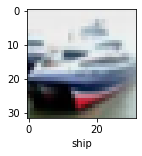

In [33]:
plot_sample(x_test,y_test,1)

In [34]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [35]:
classes[y_classes[1]]

'ship'

In [36]:
classes[y_classes[2]]

'automobile'

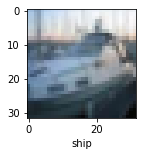

In [37]:
plot_sample(x_test,y_test,2)

In [38]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1000
           1       0.77      0.85      0.80      1000
           2       0.59      0.57      0.58      1000
           3       0.51      0.53      0.52      1000
           4       0.63      0.63      0.63      1000
           5       0.63      0.56      0.60      1000
           6       0.68      0.84      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.77      0.82      0.80      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

